# $e^{-}$ &mdash; Learning: Appliance Level Load Monitoring

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

sns.set_style('whitegrid', {'axes.grid' : False})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [3]:
Image(filename = "images/NILM.jpg", width=500, height=500)

_Goal: Provide estimates of power demand of appliance n at time t_

## SMART METER

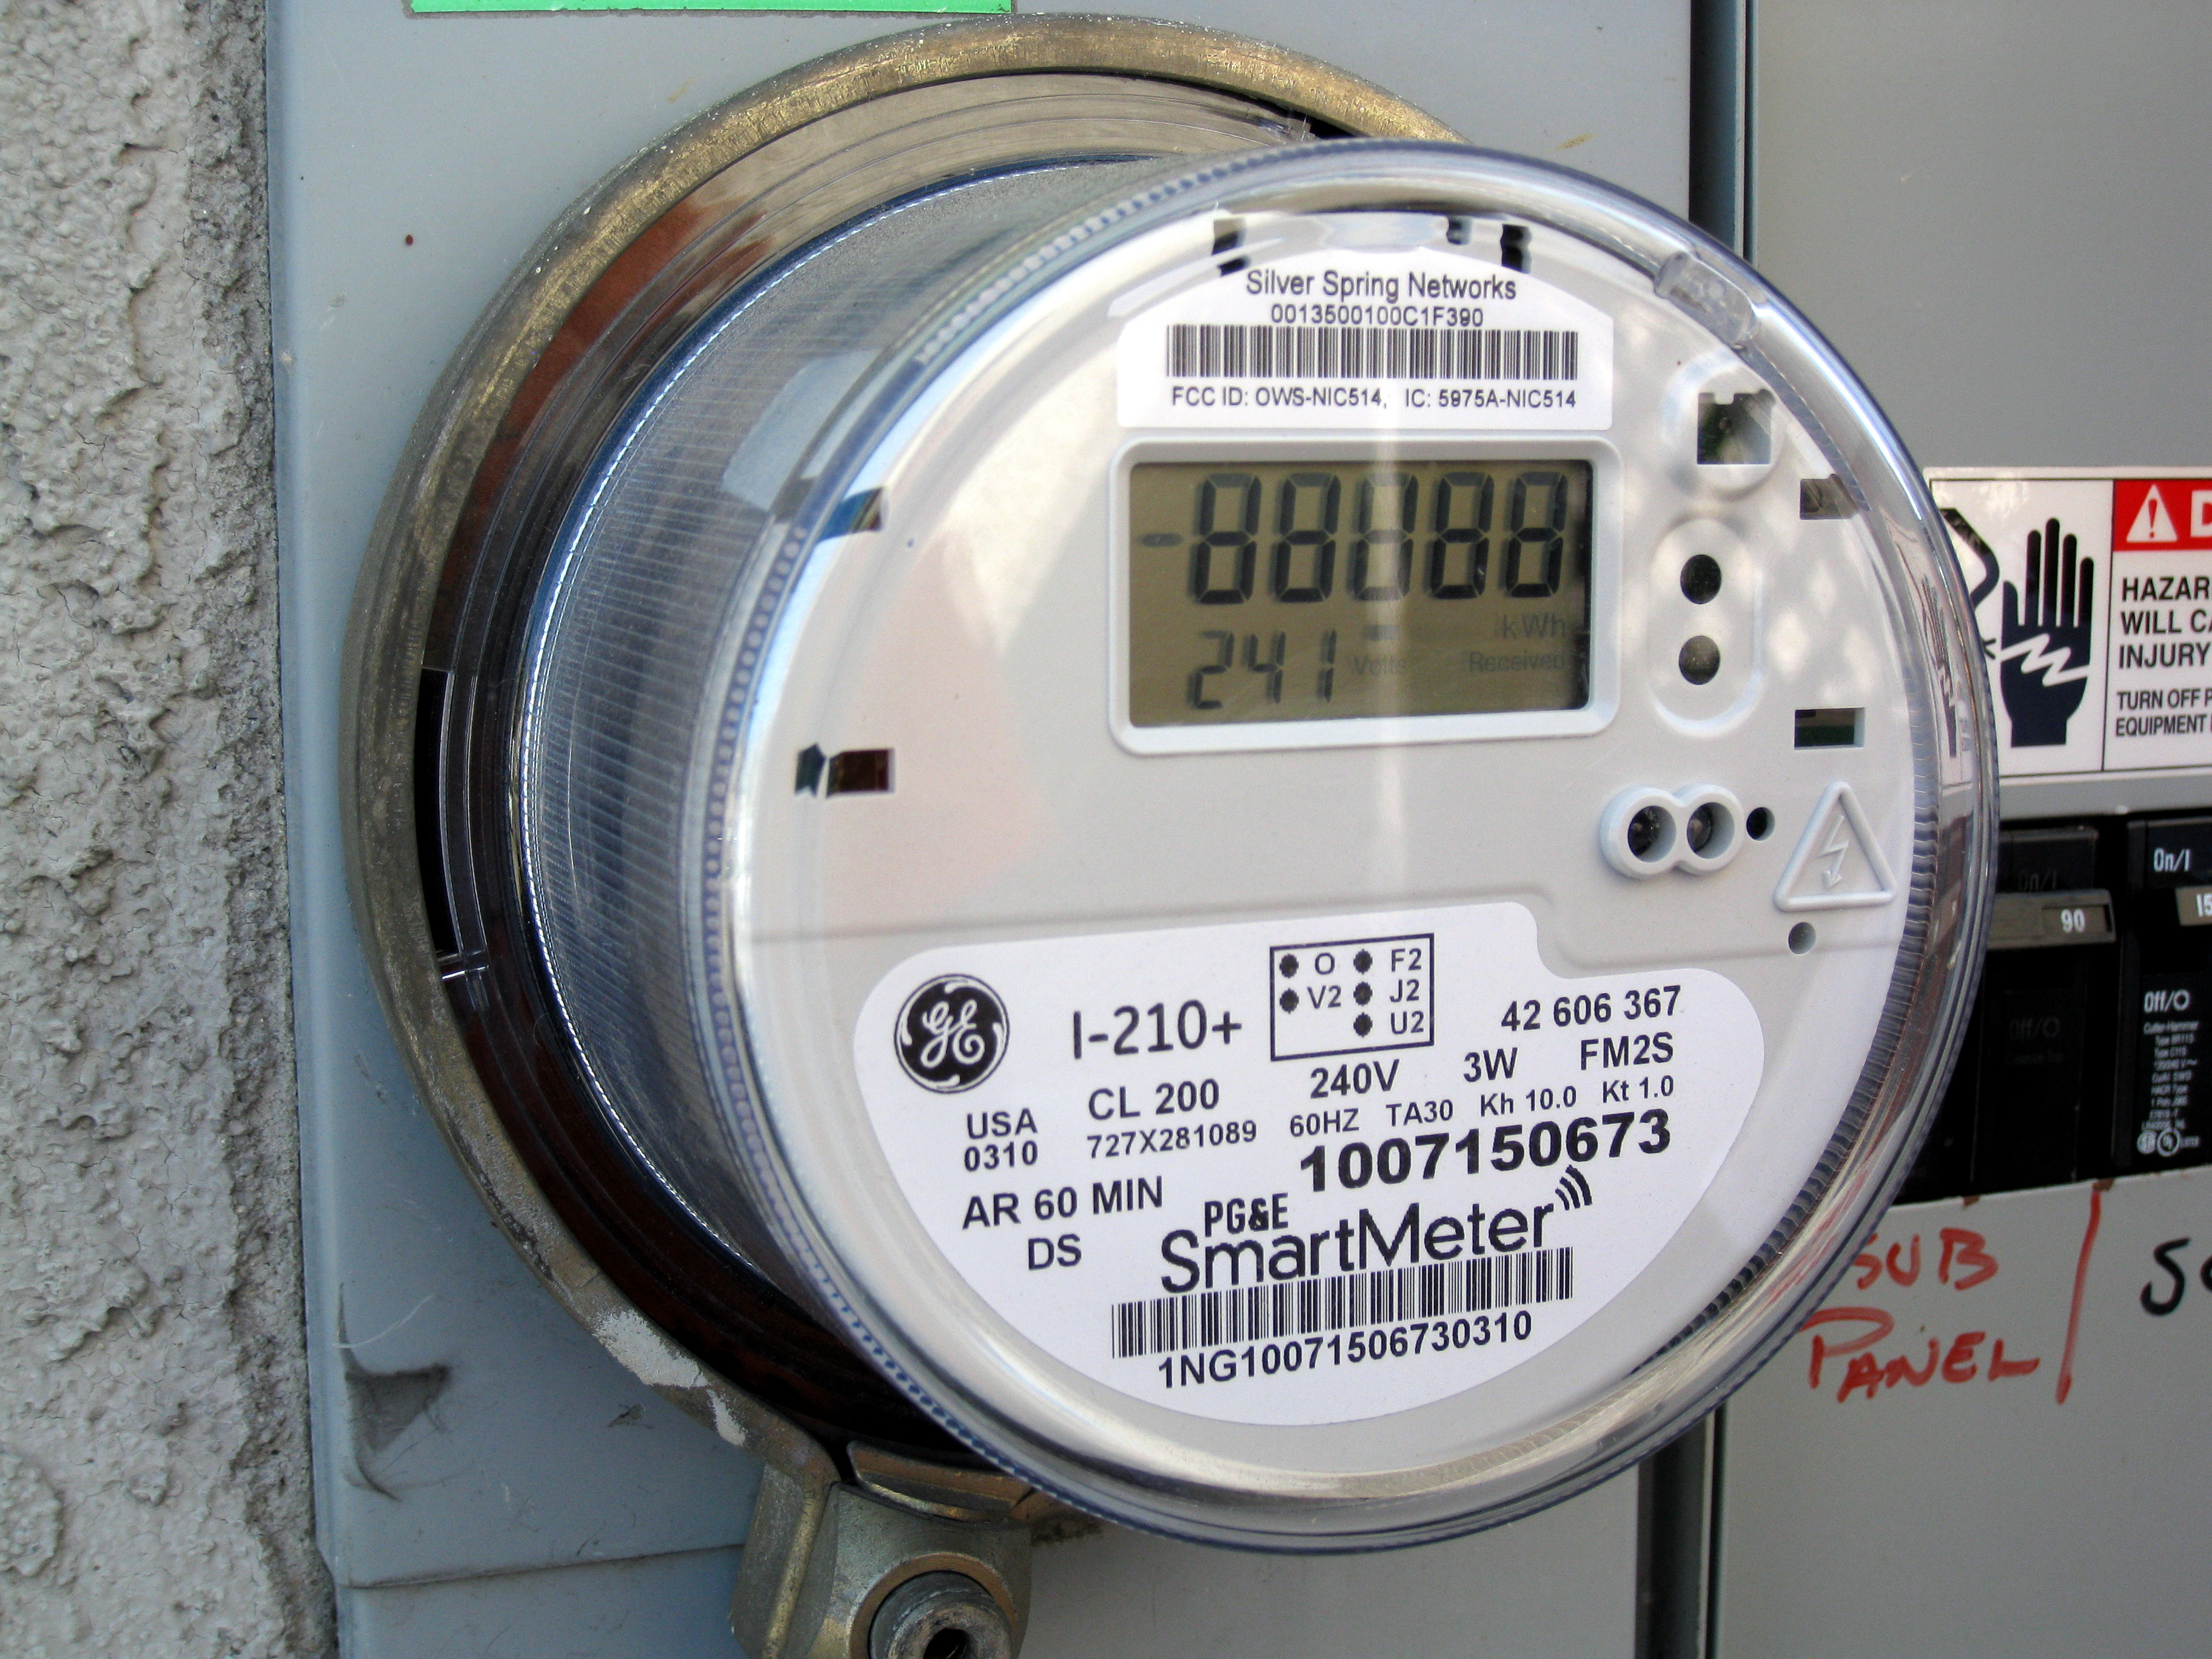

In [4]:
Image(filename = "images/smart_meter.jpg", width=400, height=400)

_Tracks and records customer's home electricity use and transmits it back to electric companies_

## Pojected 90M AMI (2020), USA

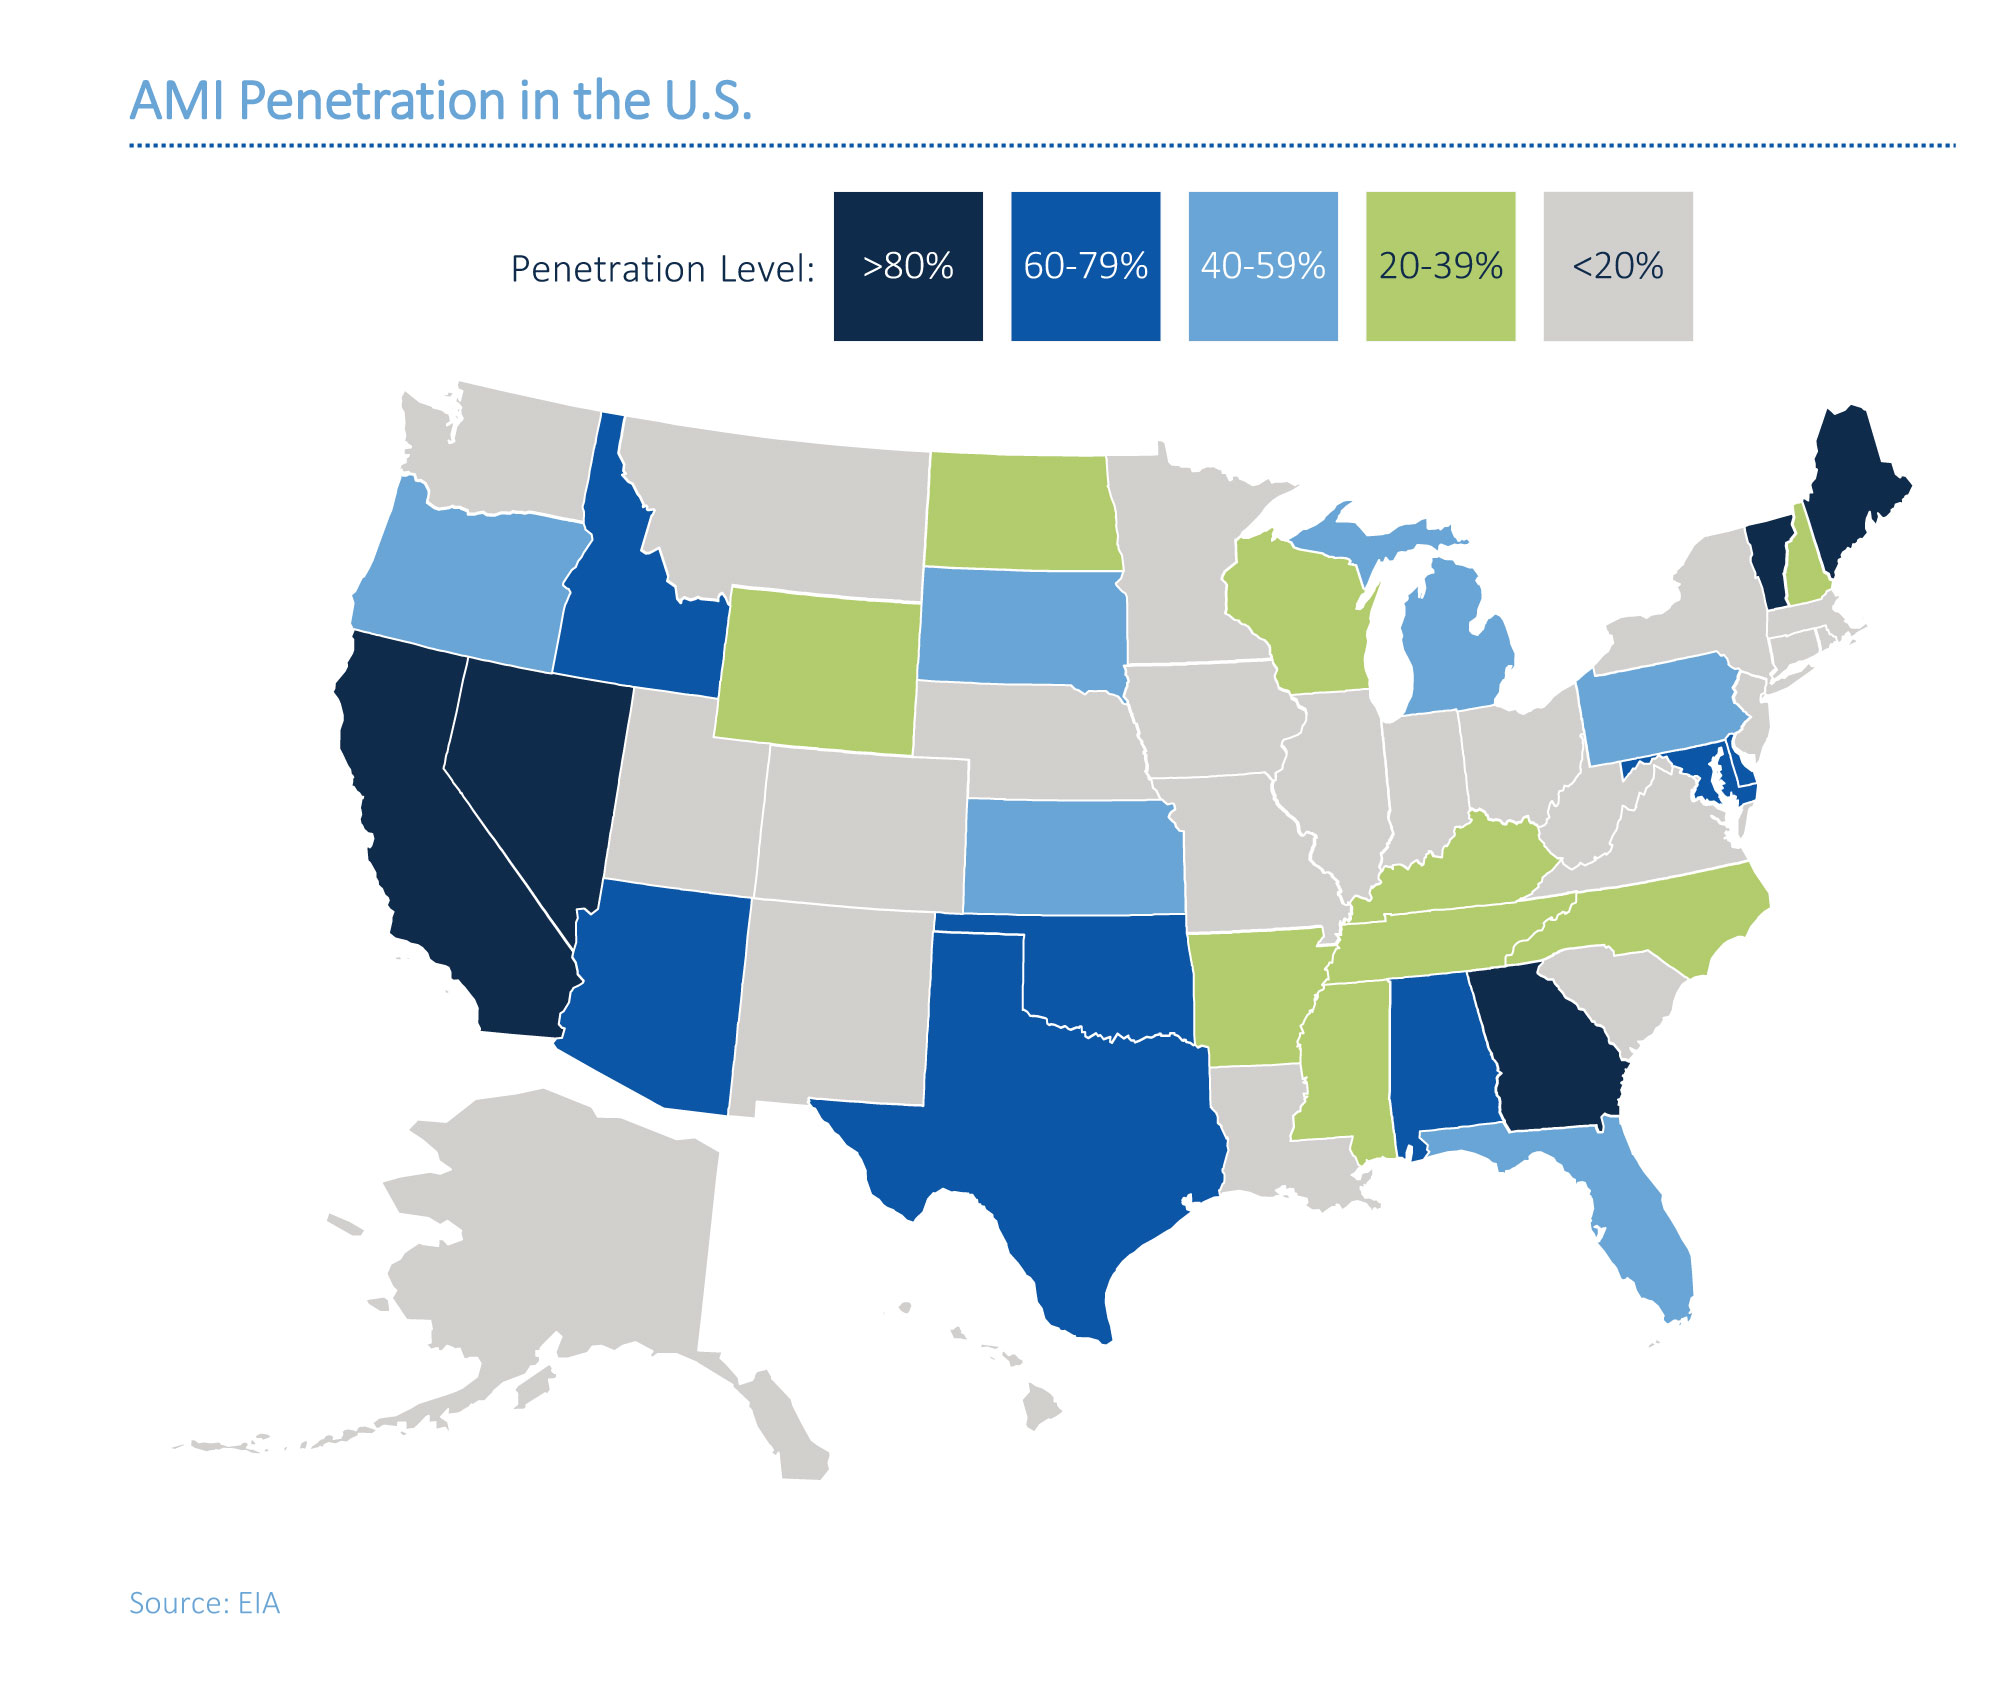

In [6]:
Image(filename = "images/ami.jpg", width=800, height=800)

**Existing ( _As of 2015_ )**

* PG&E : > 5 M
* SCE  : > 5 M
* FP&L : 5 M
* Texas Oncor: 3.4 M

### WHAT YOU DO SEE:

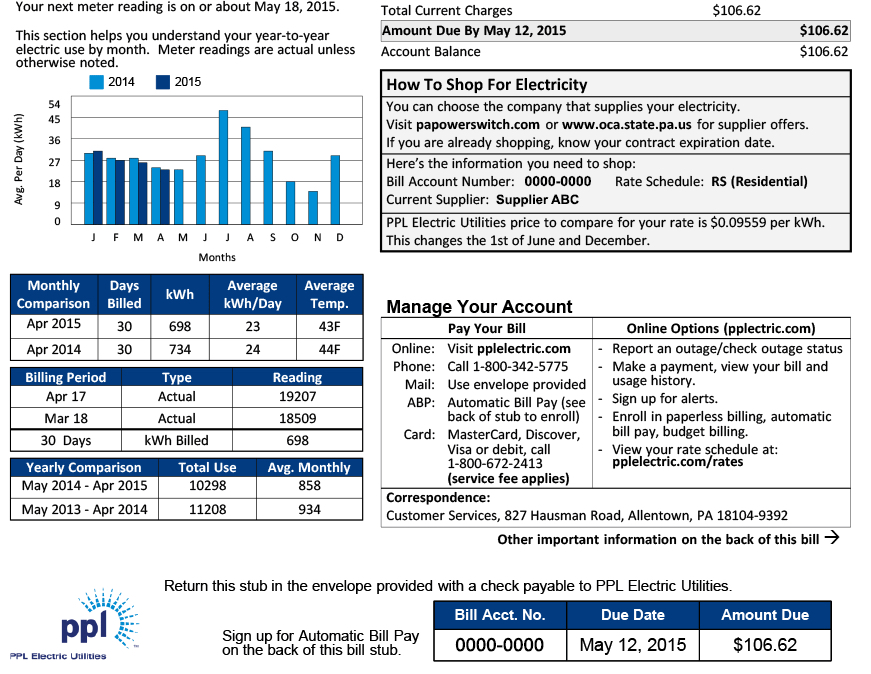

In [7]:
Image(filename = "images/bill.jpg", width=300, height=300, retina=True)

### WHAT YOU DON'T SEE:

In [8]:
Image(filename = "images/appliances.png", width=500, height=600, retina=True)

### WHY is this Important?

* Growth in energy consumption 
* Enable automated energy management systems							
* Opportunity to reduce waste!

In [9]:
table = FF.create_table(example)
py.iplot(table, filename='example_costs')

_The underlying assumption in the first cost column is that the applaince is on for **5 hrs/day** for a month, while being on for **24 hrs/day** in the second cost column. The difference column shows the financial impact of these two cases of appliance usage. For the 5 seemingly low level appliances, a customer can expect a bill differing up to **\$40/month**_

### SOLUTION METHODS

##### Submetering
* Hardware Costs (\$25 - \$50 / appliance)
* \$10 / appliance at scale

##### Smart Appliances (IOT)
* Rapidly growing, but still ways to go

##### Non-Intrusive Load Monitoring (NILM)
* Old concept, new advances in ML techniques
* Enhancing the value of already existing meter assets

### APPLIANCE DATA

<pre>
```

|     Datasets    |   Institution   |   Location   |
|-----------------|-----------------|--------------|
| REDD (2011)     | MIT             | MA, USA      |
| BLUED (2012)    | CMU             | PA, USA      |
| Smart* (2012)   | UMass           | MA, USA      |
| Tracebase (2012)| Darmstadt       | Germany      | 
| Sample (2013)   | Pecan Street    | TX, USA      |
| HES (2013)      | DECC, DEFRA     | UK           |
| AMPds (2013)    | Simon Fraser U. | BC, Canada   | 
| iAWE (2013)     | IIT Delhi       | Delhi, India |
| UK-DALE (2014)  | Imperial College| London, UK   |
| DREDD (2015)    | TUDelft         | Netherlands  |

```
</pre>


In [10]:
Image(filename = "images/data.png", width=500, height=600, retina=False)

### EXPLORING THE APPLIANCE SIGNALS

In [12]:
data.head()

television    fan  fridge  laptop_computer  \
time                                                              
2015-07-05 00:00:00         0.0  29.65   99.21            28.34   
2015-07-05 00:00:01         0.0  29.65   99.21            28.34   
2015-07-05 00:00:02         0.0  29.65   99.21            28.34   
2015-07-05 00:00:03         0.0  29.65   99.21            28.34   
2015-07-05 00:00:04         0.0  29.65   99.21            28.34   

                     electric_heating_element  oven  unknown  washing_machine  \
time                                                                            
2015-07-05 00:00:00                      2.29   0.0      0.0             0.68   
2015-07-05 00:00:01                      2.29   0.0      0.0             0.68   
2015-07-05 00:00:02                      2.29   0.0      0.0             0.68   
2015-07-05 00:00:03                      2.29   0.0      0.0             0.68   
2015-07-05 00:00:04                      2.29   0.0      0.0             0.68   

                     microwave  toaster  sockets  cooker  
time                                                      
2015-07-05 00:00:00       1.24      0.0     7.35     0.0  
2015-07-05 00:00:01       1.24      0.0     7.35     0.0  
2015-07-05 00:00:02       1.24      0.0     7.35     0.0  
2015-07-05 00:00:03       1.24      0.0     7.35     0.0  
2015-07-05 00:00:04       1.24      0.0     7.35     0.0

In [13]:
print "%-25s | %-10s | %-10s | %-10s | %-10s | %-10s\n" %('Applaince', 'Min', 'Mean', 'Median', 'Mode', 'Max')
for j in data.columns:
    app_data = data[j]
    print "%-25s | %-10s | %-10s | %-10s | %-10s | %-10s" \
    %(j, app_data.min(), round(app_data.mean()), round(np.median(app_data.unique())), 
         Counter(app_data).most_common(1)[0][0] , app_data.max())

Applaince                 | Min        | Mean       | Median     | Mode       | Max       

television                | 0.0        | 3.0        | 48.0       | 0.0        | 70.03     
fan                       | 0.0        | 1.0        | 24.0       | 0.0        | 40.84     
fridge                    | 0.0        | 33.0       | 93.0       | 0.0        | 274.79    
laptop_computer           | 0.0        | 8.0        | 29.0       | 0.0        | 67.3      
electric_heating_element  | 2.29       | 12.0       | 6.0        | 2.55       | 111.18    
oven                      | 0.0        | 2.0        | 771.0      | 0.0        | 1577.33   
unknown                   | 0.0        | 0.0        | 175.0      | 0.0        | 689.83    
washing_machine           | 0.68       | 4.0        | 98.0       | 0.68       | 1873.98   
microwave                 | 0.0        | 5.0        | 506.0      | 1.24       | 2004.74   
toaster                   | 0.0        | 1.0        | 449.0      | 0.0        | 715.24   

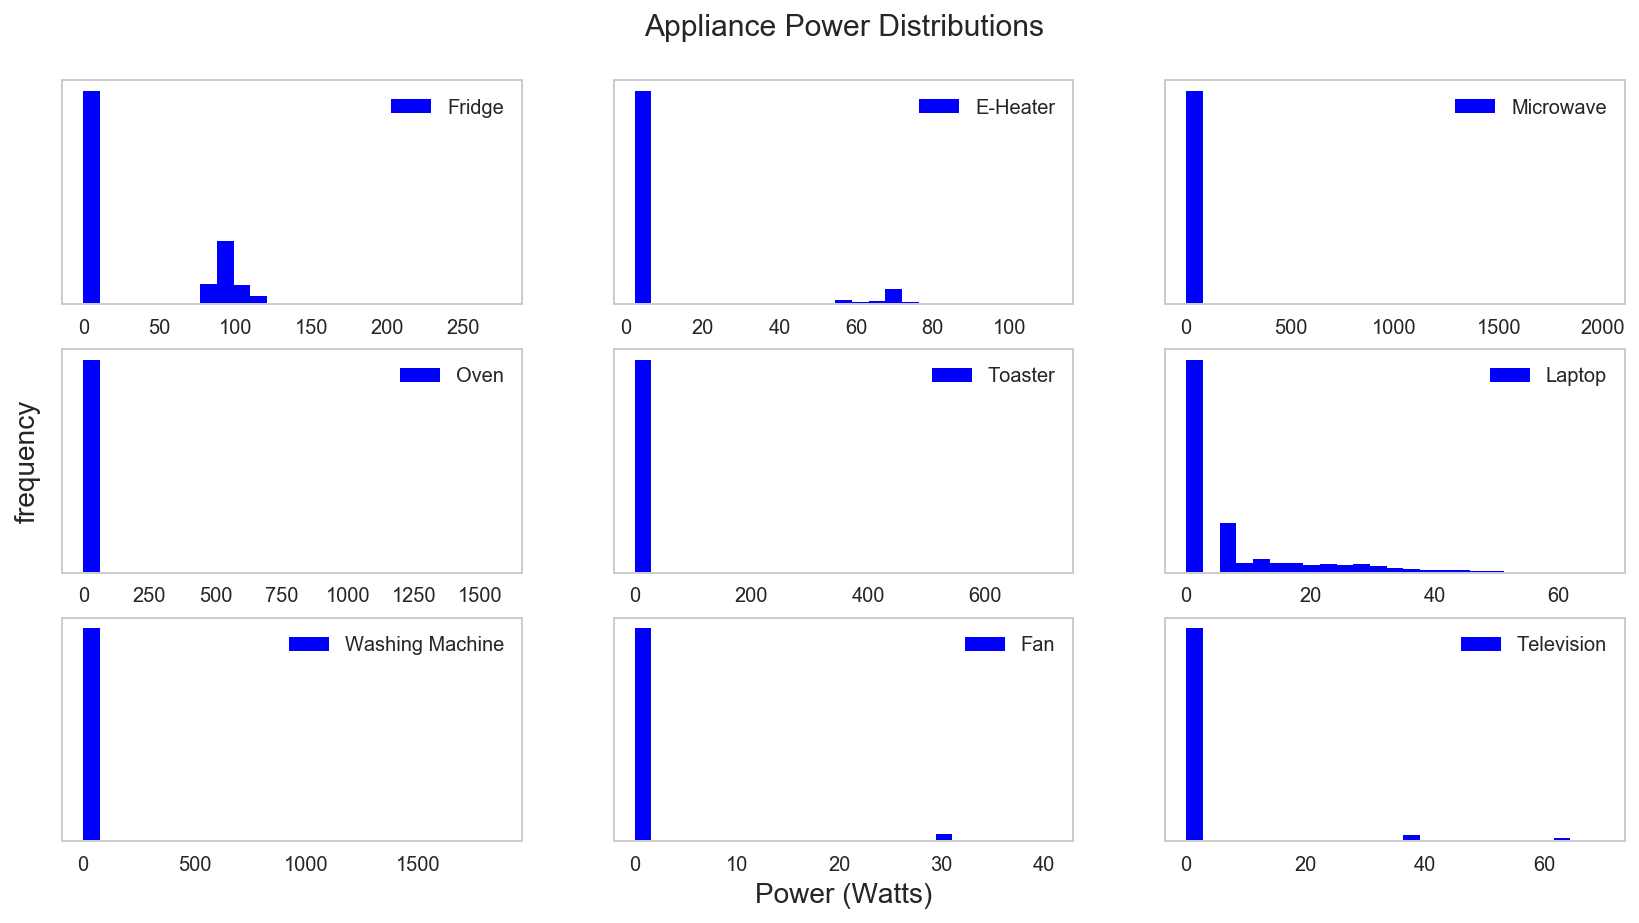

In [14]:
fig, ax = plt.subplots(3,3, figsize=(14, 7)) 

bin_num = 25
color='b'

ax[0,0].hist(data.fridge, bins=bin_num, label='Fridge', color=color)
ax[0,1].hist(data.electric_heating_element, bins=bin_num, label='E-Heater', color=color)
ax[0,2].hist(data.microwave, bins=bin_num, label='Microwave', color=color)

ax[1,0].hist(data.oven, bins=bin_num, label='Oven', color=color)
ax[1,1].hist(data.toaster, bins=bin_num, label='Toaster', color=color)
ax[1,2].hist(data.laptop_computer, bins=bin_num, label='Laptop', color=color)

ax[2,0].hist(data.washing_machine, bins=bin_num, label='Washing Machine', color=color)
ax[2,1].hist(data.fan, bins=bin_num, label='Fan', color=color)
ax[2,2].hist(data.television, bins=bin_num, label='Television', color=color)

for row in range(3):
    for col in range(3):
        ax[row,col].set_yticklabels([]) 
        ax[row,col].legend()

ax[0,1].set_title('Appliance Power Distributions\n', fontsize=15)
ax[1,0].set_ylabel('frequency', fontsize=14)
ax[2,1].set_xlabel('Power (Watts)', fontsize=14)

plt.show()

### APPLIANCE TYPES

1. Type I: Single State [ON/OFF]
   * Table Lamp		
2. Type II: Multi-State
   * Finite State Machines (FSM)
   * Washing Machine														
3. Type III: Continuously Varying State
   * Continuously Variable Devices (CVD)
   * Dimmer Lights															
4. Type IV: Remain active at constant rate
   * Smoke Detector, Cable TV Receivers

In [15]:
# TRAIN/TEST SPLIT

train_date_1 = '2015-07-05' 
train_date_2 = '2015-10-05' 

test_date_1 = '2015-10-06' 
test_date_2 = '2015-12-05'

lengths_train = len(data[train_date_1:train_date_2])
print 'Training Length: %s' %lengths_train
lengths_test = len(data[test_date_1:test_date_2])
print 'Testing Length : %s' %lengths_test

Training Length: 8035200
Testing Length : 5266799


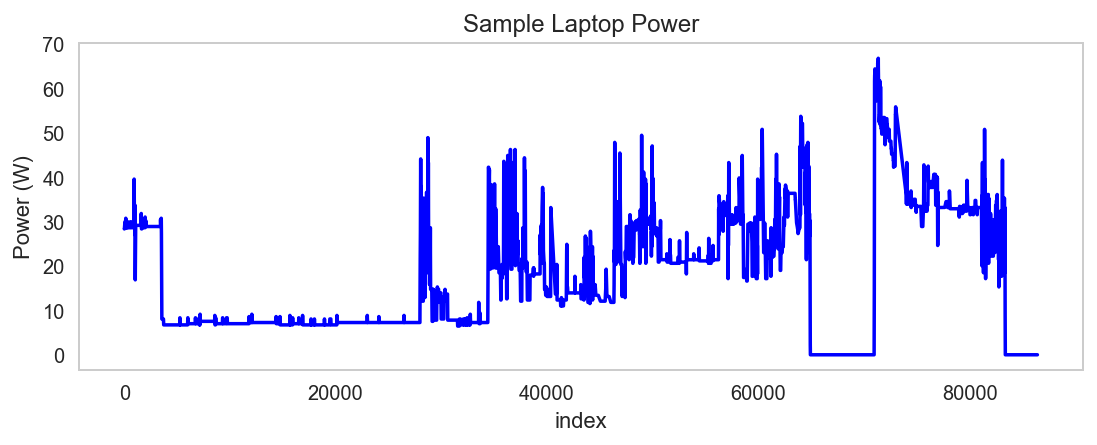

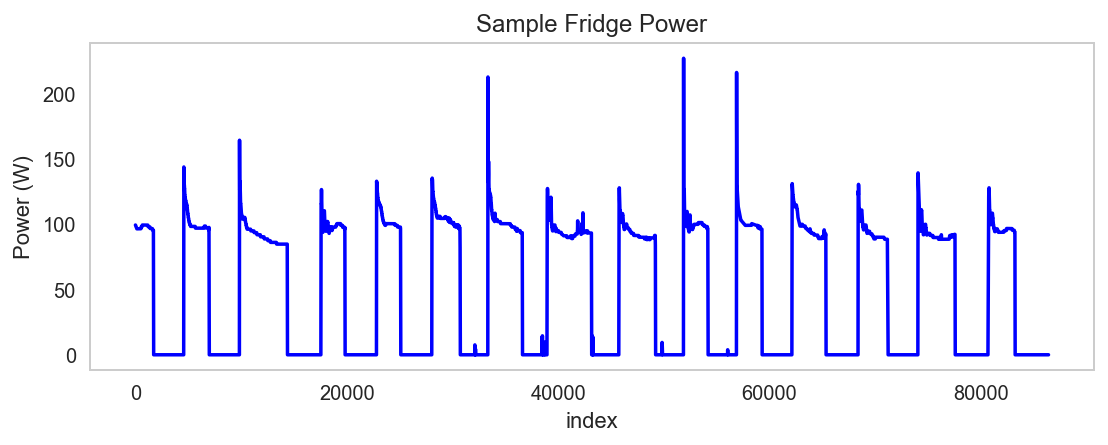

In [17]:
for appliance, plug_data in power.items():
    plt.figure(figsize=(9,3))
    plt.plot(plug_data[:86400], color='b')    
    plt.title("Sample %s Power" %(appliance))
    plt.xlabel("index")
    plt.ylabel("Power (W)");

In [18]:
simulation = pd.read_csv('test_simulation.csv')
simulation.set_index('time', inplace=True)
simulation.columns = ['E-Heater', 'Fridge', 'Laptop', 'Washing Machine', 'Total']
for col in simulation.columns:
    simulation[col] = simulation[col].apply(lambda x: round(x, 2))


import plotly.plotly as py
import plotly.graph_objs as go

main = go.Scatter(x=simulation.index, y=simulation['Total'], name ="Aggregate", line=dict(color='#0d2be8'), opacity=0.8)

app_1 = go.Scatter(x=simulation.index, y=simulation['Fridge'], name ="Fridge", line=dict(color='#7F7F7F'), opacity=0.8)
app_2 = go.Scatter(x=simulation.index, y=simulation['Washing Machine'], name ="Washing Machine", line=dict(color='#46846e'), opacity=0.8)
app_3 = go.Scatter(x=simulation.index, y=simulation['E-Heater'], name="E-Heater", line=dict(color='#17BECF'), opacity=0.8)
app_4 = go.Scatter(x=simulation.index, y=simulation['Laptop'], name="Laptop", line=dict(color='#2a465e'), opacity=0.8)

simulate = [main, app_1, app_2, app_3, app_4]

layout = dict(title = "Appliance Disaggregation")

fig = dict(data=simulate, layout=layout)
py.iplot(fig)

The draw time for this plot will be slow for clients without much RAM.


## Factorial Hidden Markov Model

_HMM is a mixture model encoding information about the history of a time series in the value of a single multinomial variable &mdash; the hidden state &mdash; which can take on K discrete values_

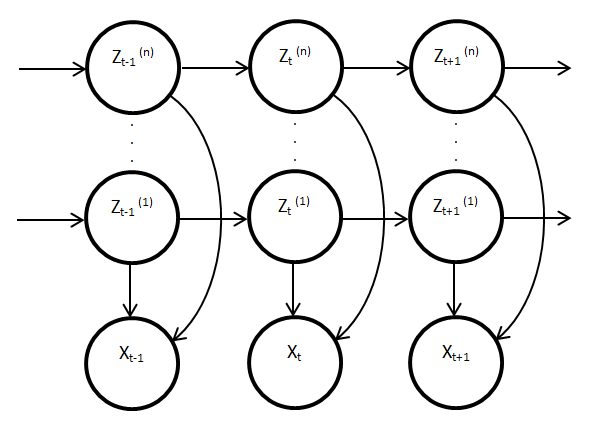

In [19]:
Image(filename = "images/fhmm.png", width=400, height=400)

**Given** $\Theta${$\pi$, A, $\Phi$} & X **Find** optimal Z

**Given** $\Theta${$\pi$, A, $\Phi$} & X **Find** P(X|$\Theta$,X)

**Given** X **Estimate** $\Theta${$\pi$, A, $\Phi$}


#### Assumptions

Limited Horizon:
$P(Z_{t}\ |\ Z_{t-1}, Z_{t-2},..., Z_{1}) = P(Z_{t}\ |\ Z_{t-1})$

Stationary Process:
$P(Z_{t}\ |\ Z_{t-1}) = P(Z_{2}\ |\ Z_{1});\  t\ \in\  2,...,T$

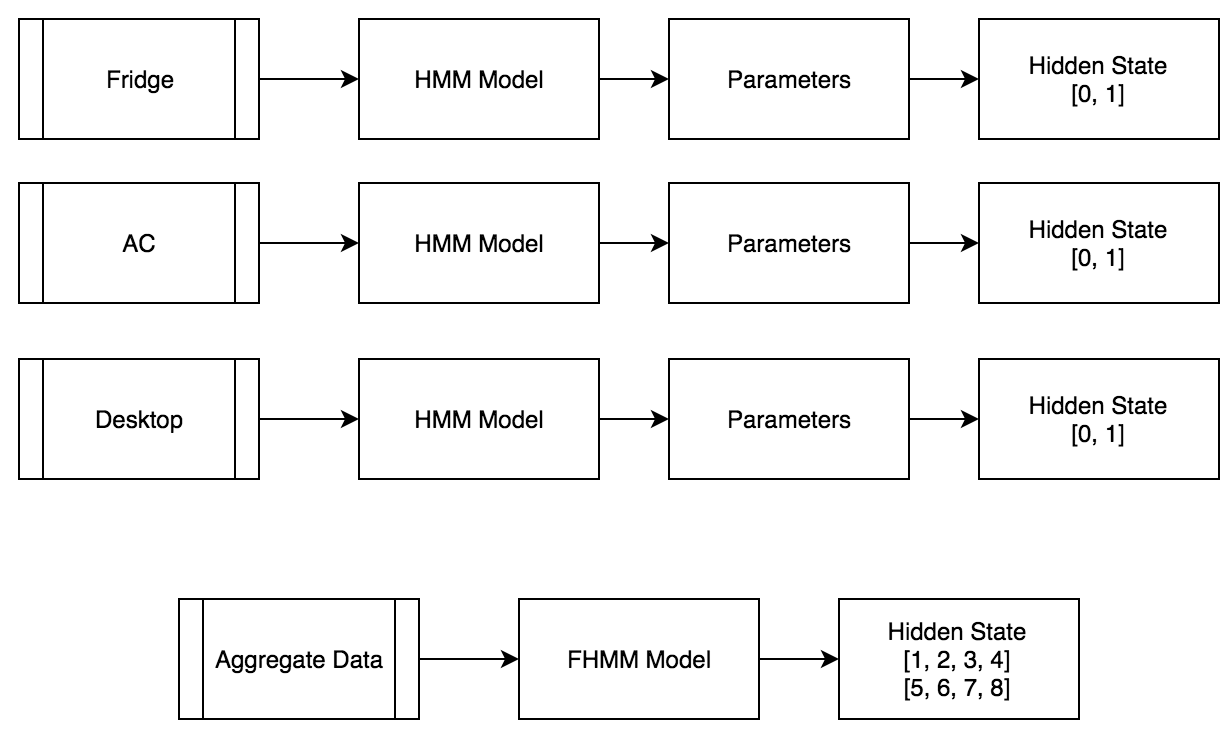

In [20]:
Image(filename = "images/hmms.png", width=600, height=600)

### METRICS FOR EVALUATION

$$Total\ Energy\ Error = \left|\sum_{t}y_t^{(n)}- \sum_{t}\hat{y}_t^{(n)}\right|$$
$$ $$
$$Normalized\ Error = \frac{\sum_{t}\left|y_t^{(n)}- \hat{y}_t^{(n)}\right|}{\sum_{t}y_t^{(n)}}$$
$$ $$
$$RMS = \sqrt{\frac{1}{T}\sum_{t}(y_t^{(n)}- \hat{y}_t^{(n)})}$$
$$ $$
$$Precision = \frac{TP}{TP + FP}$$
$$ $$
$$Recall  = \frac{TP}{TP + FN}$$
$$ $$
$$F_{1}\ Score = \frac{2 * PRE * REC}{PRE + REC}$$

In [21]:
run fhmm.py

In [22]:
# INSTANTIATE THE CLASS
fhmm = Fhmm()

# TRAIN THE MODEL
fhmm.train(appliances.values())

Fitting appliance: Laptop ...
Fitting appliance: Fridge ...
Fitting appliance: Washing_Machine ...
Fitting appliance: E-Heater ...


### SAMPLE RESULTS

<pre>
```
| Appliance       | Baseline Precision  | 
|-----------------|---------------------|
| Electric Heater | OFF: 0.72  ON: 0.28 |
| Refridgerator   | OFF: 0.68  ON: 0.32 |
| Laptop          | OFF: 0.81  ON: 0.19 |
| Washing Machine | OFF: 0.99  ON: 0.01 |

```
</pre>

<pre>
```

| Appliance       |      Precision      |        Recall       |      F1-Score       |
|-----------------|---------------------|---------------------|---------------------|
| Electric Heater | OFF: 0.89  ON: 0.82 | OFF: 0.94  ON: 0.71 | OFF: 0.91  ON: 0.76 |
| Refridgerator   | OFF: 0.94  ON: 0.89 | OFF: 0.95  ON: 0.88 | OFF: 0.95  ON: 0.89 |
| Laptop          | OFF: 0.89  ON: 0.38 | OFF: 0.76  ON: 0.61 | OFF: 0.82  ON: 0.47 |
| Washing Machine | OFF: 1.00  ON: 0.14 | OFF: 0.97  ON: 0.50 | OFF: 0.98  ON: 0.22 |

```
</pre>

<pre>
```

| Appliance       |   RMS Baseline  |   RMS Model    |
|-----------------|-----------------|----------------|
| Electric Heater |      30  W      |      21 W      | 
| Refridgerator   |      44  W      |      25 W      |
| Laptop          |      11  W      |      12 W      |
| Washing Machine |      58  W      |      59 W      |

```
</pre>

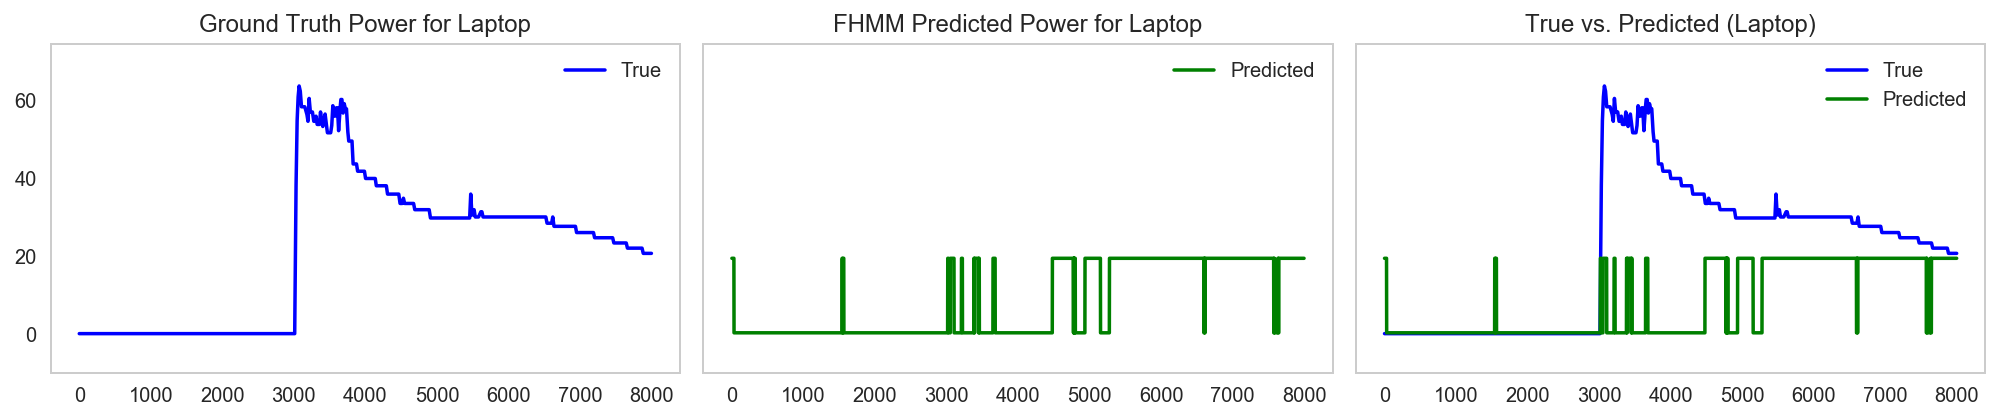

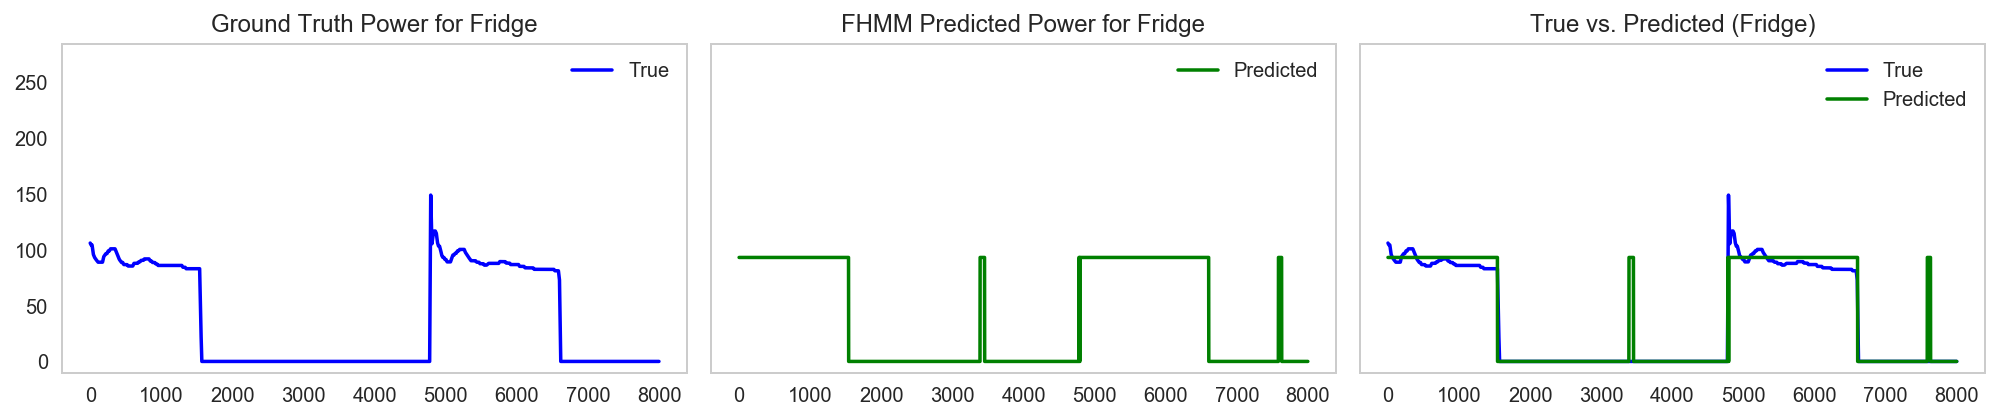

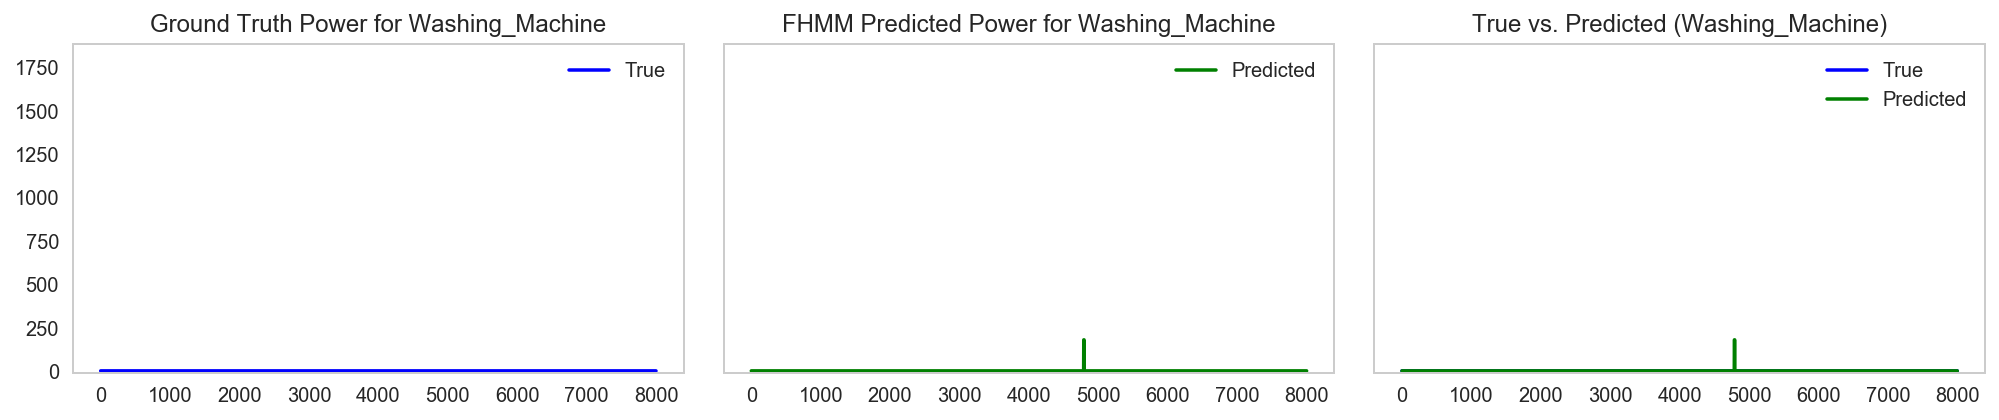

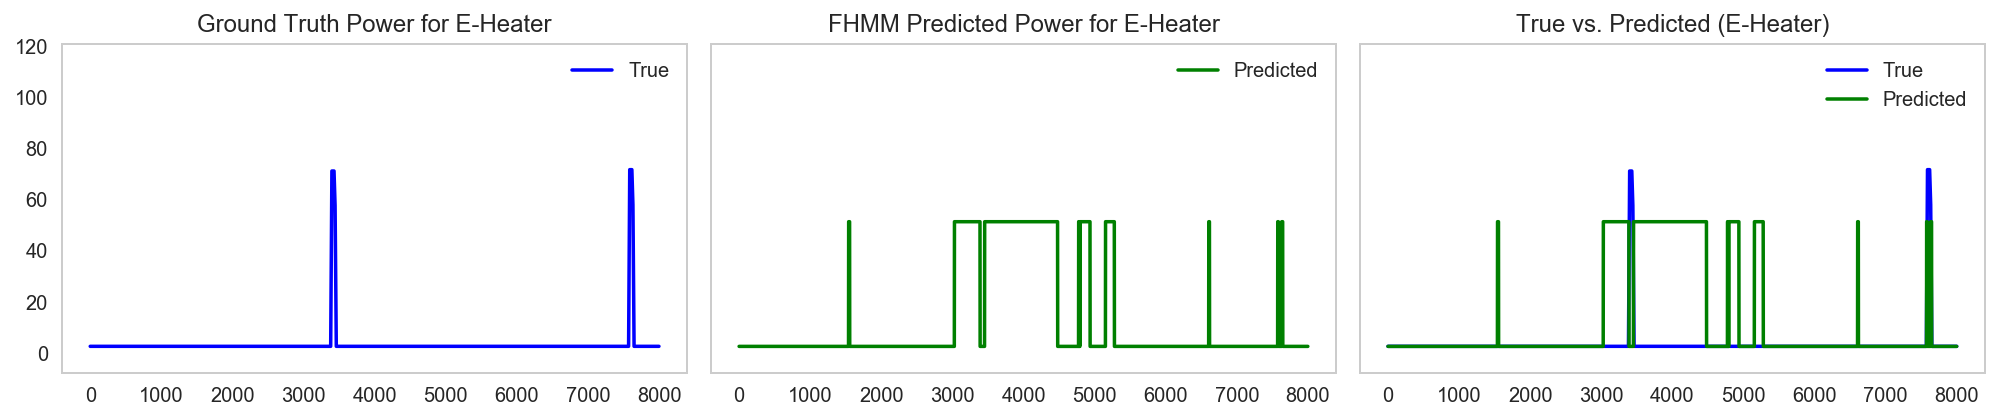

In [36]:
# COMPARING TRUE VS REAL POWER DIST IN TEST SET
for appliance in fhmm.model:
    fig, ax = plt.subplots(1,3, figsize=(14,3), sharey=True)
    
    ax[0].plot(power_test[appliance][:8000], color='b', label='True')
    ax[0].set_title('Ground Truth Power for %s' %appliance)
    ax[0].legend()
    
    ax[1].plot(decoded_power_test[appliance][:8000], color='g', label='Predicted')    
    ax[1].set_title('FHMM Predicted Power for %s' %appliance)
    ax[1].legend()
    
    ax[2].plot(power_test[appliance][:8000], color='b', label='True')
    ax[2].plot(decoded_power_test[appliance][:8000], color='g', label='Predicted') 
    ax[2].set_title('True vs. Predicted (%s)' %appliance)
    ax[2].legend()
    
    plt.ylim((np.min(power_test[appliance])-10, np.max(power_test[appliance])+10))
    plt.tight_layout()

In [40]:
main = go.Scatter(x=simulation.index, y=simulation['Total'], name ="Aggregate", line=dict(color='#0d2be8'), opacity=0.8)

app_1 = go.Scatter(x=simulation.index, y=decoded_power_test['Fridge'][:8000], name ="Fridge", line=dict(color='#7F7F7F'), opacity=0.8)
app_2 = go.Scatter(x=simulation.index, y=decoded_power_test['Washing_Machine'][:8000], name ="Washing Machine", line=dict(color='#46846e'), opacity=0.8)
app_3 = go.Scatter(x=simulation.index, y=decoded_power_test['E-Heater'][:8000], name="E-Heater", line=dict(color='#17BECF'), opacity=0.8)
app_4 = go.Scatter(x=simulation.index, y=decoded_power_test['Laptop'][:8000], name="Laptop", line=dict(color='#2a465e'), opacity=0.8)

simulate_test = [main, app_1, app_2, app_3, app_4]

layout = dict(title = "Predicted Disaggregation")

fig = dict(data=simulate_test, layout=layout)
py.iplot(fig)

The draw time for this plot will be slow for clients without much RAM.


### MODEL RESULTS
<pre>
```

|    Appliance    | ON-PRC [Model/Base]| RMS [Model/Base] W |  
|-----------------|--------------------|--------------------|
| Television      |    [0.92 / 0.12]   |     [09 / 15]      |
| Fan             |    [0.44 / 0.07]   |     [08 / 07]      |
| Laptop          |    [0.38 / 0.19]   |     [12 / 11]      |
| E-Heater        |    [0.82 / 0.28]   |     [21 / 30]      |
| Fridge          |    [0.89 / 0.32]   |     [25 / 44]      |
| Microwave       |    [0.62 / 0.02]   |     [61 / 74]      |
| Oven            |    [0.27 / 0.00]   |     [56 / 47]      |
| Washing Machine |    [0.14 / 0.01]   |     [59 / 58]      |


```
</pre>

In [41]:
table = FF.create_table(costs)
py.iplot(table, filename='sample_costs')

_Under the same assumptions described at the very beginning, the use of this extreme example shows the difference in price that can result from varying appliance usage: **\$590/month**_

In [42]:
table = FF.create_table(costs_2)
py.iplot(table, filename='sample_costs_model')

_When applying the model errors as underpredicting power, and the precision with which the model predicts the ON state, the price difference becomes: **\$246/month**_

### CONCLUSION

_Non-Intrusive Load Monitoring (NILM) has the potential to create additional value out of already existing metersets. The estimates at each time slice vary in terms of "closeness" for each appliance, which may suggest that the most immediate solution is to inform consumers on the usage of certain appliances. However, you lose out on reducing waste from the "unusual suspect" class of appliances._

<pre>
```
|Consumer Value |  Business Value   |  
|---------------|-------------------|
| Transparency  |       DSM         |
| Control       | Energy Efficiency |
| Save Money!!! | Dynamic Pricing   |
```
</pre>

#### WEAKNESSES
* Complexity: O(TK$^N$)
* Adding a new appliance requires retraining the whole model
* Inability to distinguish between applainces with overlapping power changes

#### NEXT STEPS
* Continue modeling and cross validations, as this is key to generalizing across metersets
* Research community growing: International Workshop on Non-Intrusive Load Monitoring. 
* General Electrics's Internet of Energy vision